# BEATS raytracing: flux density @ sample
- Analysis of results from Shadow and XOP raytracing simulations
- DMM properties as-built:
    - Optical surface modified with Si substrate metrology
    - Multilayer properties (d-spacing, layer densities) as-built for ML deposition (ML lab, ESRF)
    - Optical surface roughness from metrology (ML lab, ESRF)
______________________________________________________

Author:         Gianluca Iori (gianthk.iori@gmail.com)

Created on:   22/02/2020
Last update:  25/01/2024
______________________________________________________


In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sc
from scipy import constants
from matplotlib.ticker import ScalarFormatter
import h5py

In [4]:
%matplotlib inline

## Flux density @ sample after monochromator - Primary slits OPEN

In [48]:
# read CSV file with Shadow results
names = ['E', 'E0', 'E1', 'theta', 'Itot', 'FWHM_X', 'FWHM_Z', 'I', 'I_1', 'n', 'BW']
# the last two columns are the intensity (or n. of good rays, I) and the Tot. rays (n)
FluxDensityDMM_filecsv = 'Oasys/BEATS_BL_Flux_density_DMM_as-built.csv'
FluxDensity = pd.read_csv(FluxDensityDMM_filecsv, sep=',', names=names, skiprows=[0, 1, 2, 3, 4, 5])

#### Flux density @ DMM BW plot

In [49]:
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)

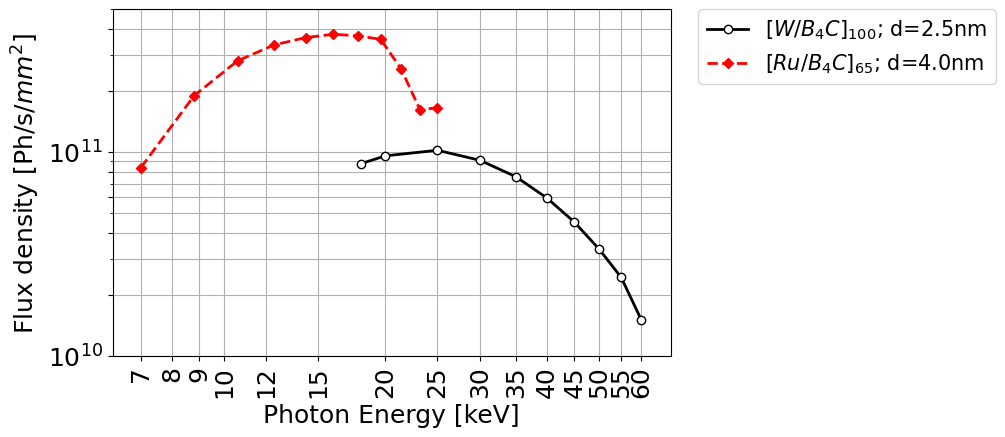

In [68]:
# plot of the flux density @ 43m
f, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [7.2, 4.5]
plt.plot(1e-3*FluxDensity['E'][1:11].astype('float'), FluxDensity['I'][1:11].astype('float'), 'o-k', markersize=6, markerfacecolor='w', linewidth=2) #, fillstyle='none'
plt.plot(1e-3*FluxDensity['E'][19:30].astype('float'), FluxDensity['I'][19:30].astype('float'), 'D--r', markersize=5, linewidth=2)
ax.set_xscale('log')
ax.set_yscale('log')
# plt.xticks(np.concatenate((np.array([6, 7, 8, 9]), np.arange(10, 75, 5))))
plt.xticks(np.array([6, 7, 8, 9, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]))
plt.xticks(rotation=90)
# plt.yticks(np.arange(1e10, 5e11, 5e10))
plt.yticks(np.array([1, 2, 4, 6, 8, 10, 20, 40])*1e10)
ax.set(xlim=(6.2, 68), ylim=(1e10, 5e11))
ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Flux density [Ph/s/$mm^2$]')
plt.grid(True, which="both")
plt.legend(['$[W/B_{4}C]_{100}$; d=2.5nm', '$[Ru/B_{4}C]_{65}$; d=4.0nm'],  bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', fontsize='small')
# f.savefig("BEATS_DMM_flux_density_DMMBW_as-built.png", bbox_inches='tight', dpi=600)

## Bragg plots of DMM operation - Energy vs Theta

In [26]:
# read CSV file with Theta-Energy vaules
names = ['E[eV]', 'theta[mrad]', 'theta[deg]']
bragg_WB4C_filecsv = 'DMM/BEATS_230626_WB4C_E_th.csv'
bragg_WB4C = pd.read_csv(bragg_WB4C_filecsv, sep=' ', names=names, skiprows=[0]) # skiprows=[0, 1, 2, 3, 4, 5]

In [27]:
bragg_RuB4C_filecsv = 'DMM/BEATS_230619_RuB4C_E_th.csv'
bragg_RuB4C = pd.read_csv(bragg_RuB4C_filecsv, sep=' ', names=names, skiprows=[0]) # skiprows=[0, 1, 2, 3, 4, 5]

#### Flux density @ DMM BW plot

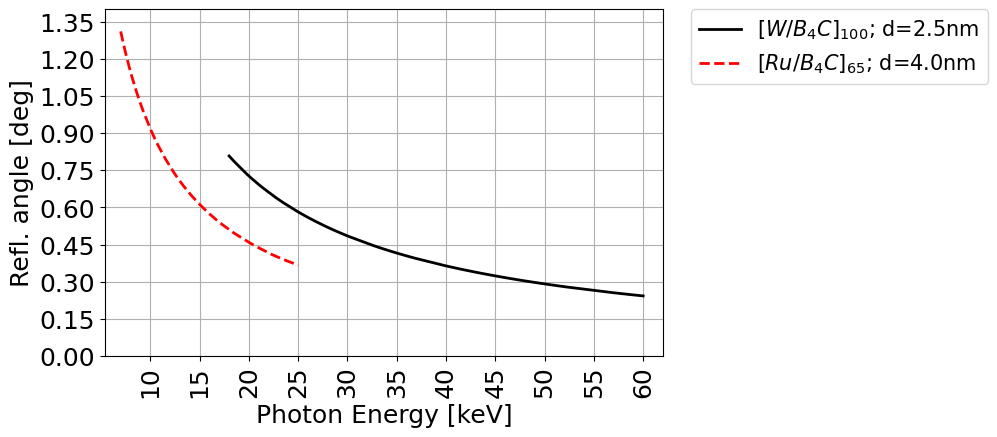

In [66]:
# plot the Energy-Theta relationships
f, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [7.2, 4.5]
plt.plot(1e-3*bragg_WB4C['E[eV]'].astype('float'), bragg_WB4C['theta[deg]'].astype('float'), '-k', linewidth=2)
plt.plot(1e-3*bragg_RuB4C['E[eV]'].astype('float'), bragg_RuB4C['theta[deg]'].astype('float'), '--r', linewidth=2)
# ax.set_xscale('log')
# ax.set_yscale('log')
# plt.xticks(np.concatenate((np.array([6, 7, 8, 9]), np.arange(10, 75, 5))))
# plt.xticks(np.array([6, 7, 8, 10, 12, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]))
plt.xticks(np.arange(5, 75, 5))
plt.xticks(rotation=90)
plt.yticks(np.arange(0., 1.4, 0.15))
ax.set(xlim=(5.4, 62), ylim=(0, 1.4))
ax.xaxis.set_major_formatter(ScalarFormatter())
# ax.yaxis.set_major_formatter(ScalarFormatter())
plt.xlabel('Photon Energy [keV]')
plt.ylabel('Refl. angle [deg]')
plt.grid(True, which="both")
plt.legend(['$[W/B_{4}C]_{100}$; d=2.5nm', '$[Ru/B_{4}C]_{65}$; d=4.0nm'],  bbox_to_anchor=(1.05, 1), borderaxespad=0., loc='upper left', fontsize='small')
f.savefig("BEATS_DMM_bragg_as-built.png", bbox_inches='tight', dpi=600)